Example notebook for using starmapper with a single sample
==========================================================
Below are examples of the high level functions available for plotting a variety of chemical probing data.

Contents:
- [Notebook set-up](#notebook-set-up)
- [Initializing MaP sample](#initializing-map-sample)
- [High-level plotting functions](#high-level-plotting-functions)
- [ShapeMapper QC](#shapemapper-qc)
- [Classic ShapeMapper Plots](#classic-shapemapper-plots)
- [Skyline plots](#skyline-plots)
- [DANCE-MaP reactivity skyline](#dance-map-reactivity-skyline)
- [Heatmap and Contour plot](#heatmap-and-contour-plot)
- [Arc Plots](#arc-plots)
- [Secondary Structure](#secondary-structure)

Notebook set-up
---------------

In [1]:
# This sets plots to display in-line by default
%matplotlib inline

# Import starmapper.
# For high-level functions, no additional modules are needed
import plotmapper as MaP

# Creates an HTML button that hides/shows code cells
# Useful for presenting research updates
MaP.create_code_button()

Initializing MaP sample
-----------------------
First, we must initialize the chemical probing sample by defining the path to each of the datafiles that will be used in this analysis.

The reference sequence for deletions must be provided in the form of a fasta file.

PDB parsing requires defining the chain ID of the RNA of interest. If the PDB is missing header information, a sequence file and offset number will also be required.

In [2]:

example = MaP.Sample(sample       = "example2",
                     profile      = "data/example2_rnasep_profile.txt",
                     ct           = "data/RNaseP.ct",
                     ss           = "data/RC_CRYSTAL_STRUCTURE.xrna",
                     rings        = "data/example2-rnasep.corrs",
                     pairs        = "data/example2-rnasep-pairmap.txt",
                     log          = "data/example2_shapemapper_log.txt",
                     dance_prefix = "data/example2_rnasep",
                     deletions    = "data/example-rnasep-deletions.txt",
                     fasta        = "data/RNaseP-noSC.fasta",
                     pdb          = "data/3dhs_Correct.pdb",
                     pdb_kwargs   = {"chain":"A"}
                     )

In [ ]:
example.make_skyline(dance=True)
example.make_skyline()

In [ ]:
example.make_shapemapper()

In [ ]:
example.make_heatmap("ct", "deletions")

In [ ]:
example.make_circle(ij="rings", profile="profile")

In [ ]:
example.make_ap(ij="pairs", all_pairs=True)

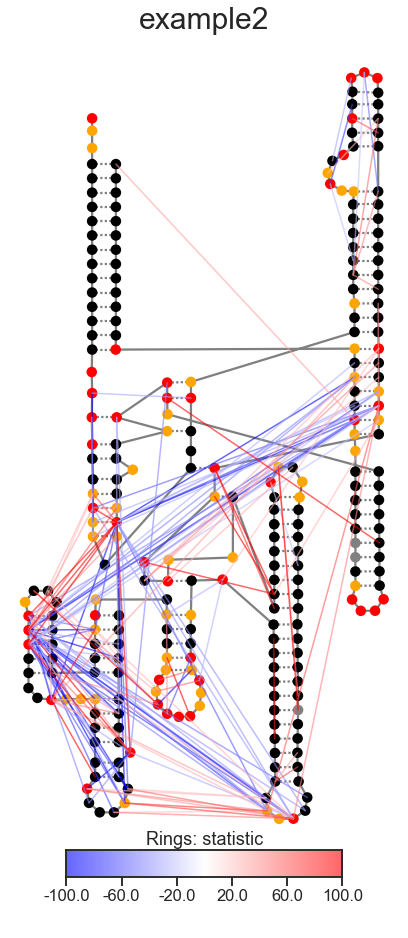

In [3]:
example.make_ss(ij="rings")

3D molecule interactive plots
-----------------------------
Unfortunately, these will not render in GitHub documentation, but they do work in browser and VSCode views of the notebook.

Controls:
* click and drag to rotate
* mouse scroll or right click to zoom
* 3rd mouse button and drag to pan


In [ ]:
plot = example.make_mol(ij="deletions", Percentile=0.99)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data, positions=[0.2], patch_artist=True, showcaps=False, showfliers=False, medianprops={'c':'black'})
ax1.boxplot(d2, positions=[0.4], patch_artist=True, showcaps=False, showfliers=False, medianprops={'c':'black'})
